In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from os import listdir
from PIL import Image
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pickle

In [2]:
path= 'images/IDC_regular_ps50_idx5'
patients = listdir(path)
len(patients)



252

In [3]:
path= 'images/IDC_regular_ps50_idx5'
images = []

for root, dirs, files in os.walk(path):
    for file in files:
        #append the file name to the list
        images.append(os.path.join(root,file))



In [4]:
len(images)

250883

In [2]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

Using TensorFlow backend.
/Users/phanisingaraju/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/phanisingaraju/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/phanisingaraju/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/phanisingaraju/anacond

In [6]:
def load_data(files):
    X = []
    y = []
    datagen = ImageDataGenerator(horizontal_flip=True)

    for file in files:
        if file.endswith(".png"):
            if(file[-5] == '1'):
                img = load_img(file, target_size = (50,50))
                data = img_to_array(img)
                pixels =data/ 255
                X.append(pixels)
                y.append(1)
                samples=expand_dims(data,0)
                it = datagen.flow(samples, batch_size=1) 
                batch=it.next()
                X.append(np.squeeze(batch, axis=0))
                y.append(1)

            elif(file[-5] == '0'):
                img = load_img(file, target_size = (50,50))
                pixels = img_to_array(img)
                pixels /= 255
                X.append(pixels)
                y.append(0)
    return np.stack(X), y
        

In [7]:
X,y=load_data(filelist)

In [10]:
y=np.vstack(y)
X.shape,y.shape

((323808, 50, 50, 3), (323808, 1))

In [11]:
np.count_nonzero(y == 1),np.count_nonzero(y == 0)

(145854, 177954)

In [88]:
X_train, X_t, y_train, y_t = train_test_split(X, y, test_size=0.3)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_t, y_t, test_size=0.5)

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import activations
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [89]:
# Create the model
mod = Sequential()
mod.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(50, 50, 3)))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(BatchNormalization())

mod.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same"))
mod.add(MaxPooling2D(pool_size=(2, 2)))
mod.add(BatchNormalization())


mod.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding="same"))
mod.add(MaxPooling2D(pool_size=(2, 2)))
#mod.add(BatchNormalization())


#model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding="same"))
#model.add(MaxPooling2D(pool_size=(2, 2)))

mod.add(Flatten())
#model.add(Dense(256, activation='relu'))
mod.add(Dense(128, activation = 'relu'))
mod.add(Dense(1, activation='sigmoid', name='visualized_layer'))

# Compile the model
mod.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("train_val_best.hdf5", monitor='val_acc', verbose=1,
    save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


In [90]:
M=mod.fit(X_train, y_train,validation_data=(X_val, y_val),  epochs=20,callbacks=[checkpoint,es])

Train on 259046 samples, validate on 64762 samples
Epoch 1/20
259046/259046 [==============================] - 1774s 7ms/step - loss: 0.3079 - acc: 0.8667 - val_loss: 0.6216 - val_acc: 0.6384

Epoch 00001: val_acc improved from -inf to 0.63838, saving model to train_val_best.hdf5
Epoch 2/20
259046/259046 [==============================] - 1780s 7ms/step - loss: 0.2710 - acc: 0.8841 - val_loss: 0.4266 - val_acc: 0.8478

Epoch 00002: val_acc improved from 0.63838 to 0.84778, saving model to train_val_best.hdf5
Epoch 3/20
259046/259046 [==============================] - 1783s 7ms/step - loss: 0.2616 - acc: 0.8891 - val_loss: 0.6742 - val_acc: 0.8183

Epoch 00003: val_acc did not improve from 0.84778
Epoch 4/20
259046/259046 [==============================] - 1783s 7ms/step - loss: 0.2482 - acc: 0.8943 - val_loss: 0.2541 - val_acc: 0.8948

Epoch 00004: val_acc improved from 0.84778 to 0.89475, saving model to train_val_best.hdf5
Epoch 5/20
259046/259046 [==============================] - 1

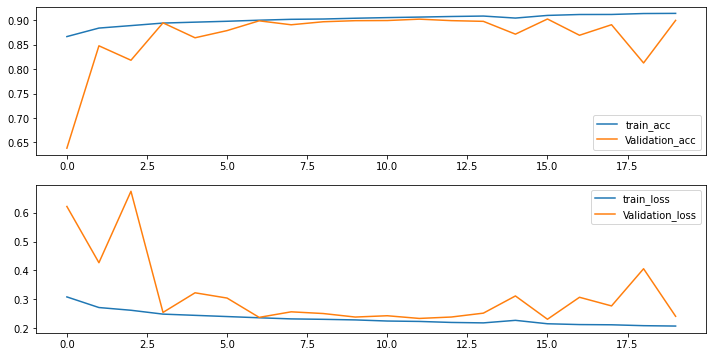

In [91]:
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(M.history['acc'], label="train_acc")
plt.plot(M.history['val_acc'], label = "Validation_acc")
plt.legend()
plt.subplot(2,1,2)
plt.plot(M.history['loss'], label = "train_loss")
plt.plot(M.history['val_loss'], label = "Validation_loss")
plt.legend()

In [5]:
model=keras.models.load_model("train_val_best.hdf5")









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)




Test accuracy: 0.8658559471620471

Test loss: 0.3178573714220564


In [9]:
Y_pred = model.predict(X_test)


In [18]:
y_pred = (Y_pred > 0.5).astype(np.int)
confusion_matrix(y_test, y_pred)

array([[17796,  2988],
       [  794,  5065]])

Text(0.5, 1.0, 'Cancer Prediction')

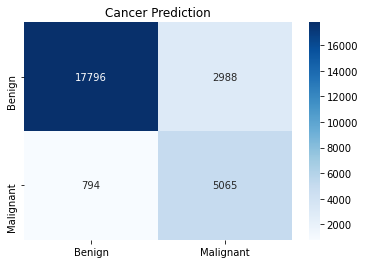

In [21]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,
                    cmap=plt.cm.Blues,fmt="d",
                   xticklabels=['Benign', 'Malignant'],
                   yticklabels=['Benign', 'Malignant']).set_title('Cancer Prediction')

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90     20784
           1       0.63      0.86      0.73      5859

    accuracy                           0.86     26643
   macro avg       0.79      0.86      0.82     26643
weighted avg       0.89      0.86      0.87     26643



In [22]:
fpr, tpr, thresholds =roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
thresholds

array([2, 1, 0])

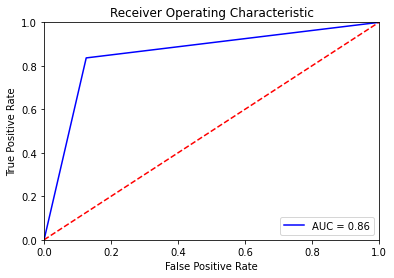

In [15]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()